In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print("Done")

Done


In [9]:
# Read in original walmart data

walmart_df = pd.read_csv('walmart_stock.csv')
walmart_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [10]:
# Our data column is currently a string. We want to convert the values in this column to a date object

walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])

In [11]:
# We want to index our dataframe on the date column

walmart_df.set_index('Date', inplace=True)

In [12]:
# Resample our data based on the average values for end of year
# Rule A = End of year

walmart_df.resample(rule="A").mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [13]:
# Resample our data based on the max values for end of year
# Rule A = End of year

walmart_df.resample(rule="A").max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


<AxesSubplot:xlabel='Date'>

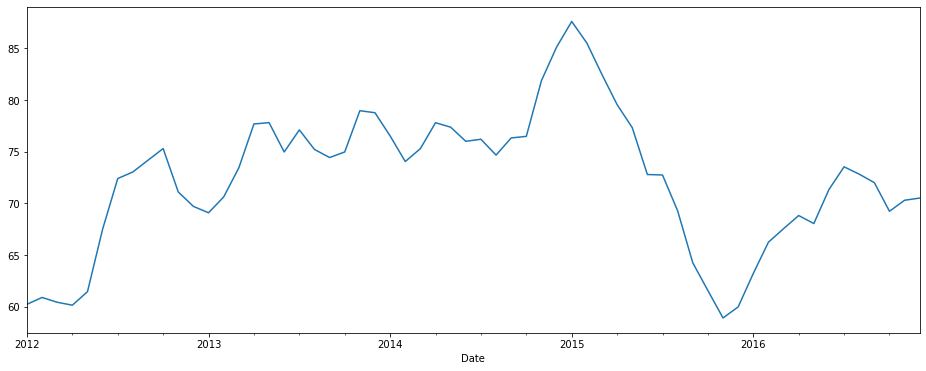

In [17]:
# Resample the average closing cost based on month end and vizualize our data

walmart_df['Close'].resample(rule='M').mean().plot(kind='line', figsize=(16,6))

In [21]:
# View the rolling 7 day average for all values.
# Note the first 6 entries in this data set will be blank as there is not enough data to gather a mean based on 7 points.

# After that, each value is the average of the 7 points before it.

walmart_df.rolling(7).mean().head(17)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

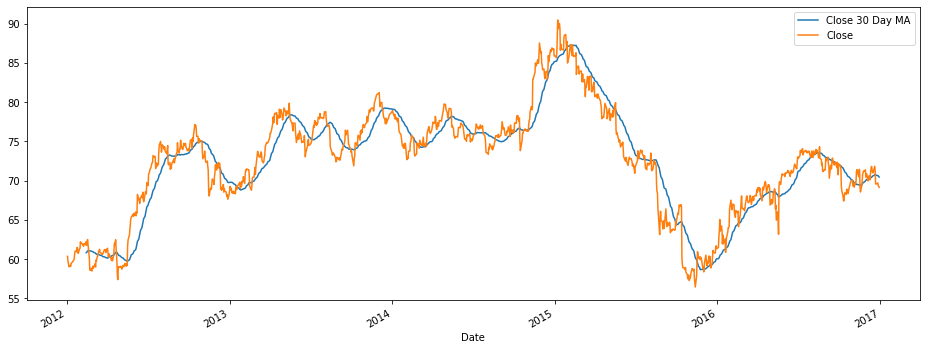

In [27]:
# Plot the closing price as well as the closing 30 day rolling average

walmart_df['Close 30 Day MA'] = walmart_df.rolling(window=30).mean()['Close']
walmart_df[['Close 30 Day MA', 'Close']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

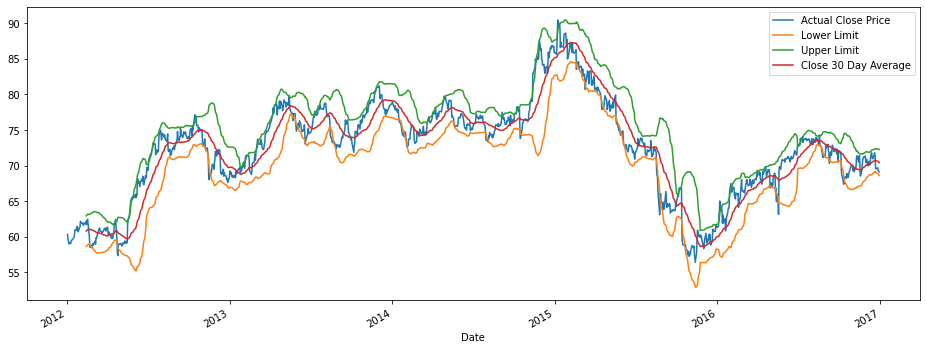

In [30]:
# Bollinger Band Sample

# Close Price 30 Day MA
walmart_df['Close 30 Day Average'] = walmart_df.rolling(window=30).mean()['Close']

# Upper Limit = 30MA + 2*std(30)
walmart_df['Upper Limit'] = walmart_df['Close 30 Day Average'] + 2*(walmart_df['Close'].rolling(30).std())

# Lower Limit = 30MA - 2*std(30)
walmart_df['Lower Limit'] = walmart_df['Close 30 Day Average'] - 2*(walmart_df['Close'].rolling(30).std())

# Actual Close Price
walmart_df['Actual Close Price'] = walmart_df['Close']

# Plot our data points
walmart_df[['Actual Close Price', 'Lower Limit', 'Upper Limit', 'Close 30 Day Average']].plot(figsize=(16,6))